<a href="https://colab.research.google.com/github/IamJac/MachineLearningAlgorithms/blob/main/TitanicCompUsingRandomForestClassifier003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UPLOADING THE FILES FROM COMPUTER MEMORY**

In [1]:
from google.colab import files
file1= files.upload()
file2= files.upload()
print("UPLOAD WAS SUCCESSFUL")

Saving train.csv to train.csv


Saving test.csv to test.csv
UPLOAD WAS SUCCESSFUL


**CONVERTING THE DATA FILES INTO DATAFRAMES**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 20)
train_data= pd.read_csv("train.csv")#train_data=data from train.csv
traind= train_data.copy()
print(train_data.head())
test_data= pd.read_csv("test.csv")#test_data=data from test.csv
test_data.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**EXPLORATORY DATA ANALYSIS**

In [3]:
#A LOOK AT THE TESTING DATA(data in test.csv)
print(test_data.shape)
print(test_data.head())
print(test_data.describe())
print(test_data.info())

(418, 11)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   11

In [4]:
#A LOOK AT THE TRAINING DATA(data from train.csv)
print(train_data.shape)
print(train_data.head())
print(train_data.describe())
print(train_data.info())
print(train_data.isnull().sum())
print(train_data.nunique())

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   
Embarked        0.013083 -0.163517  0.157112  0.104057 -0.025252  0.066654   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.013083  
Survived     0.081629  0.257307 -0.163517  
Pclass       0.018443 -0.549500  0.157112  
Sex         -0.245489 -0.182333  0.104057  

<function matplotlib.pyplot.show(close=None, block=None)>

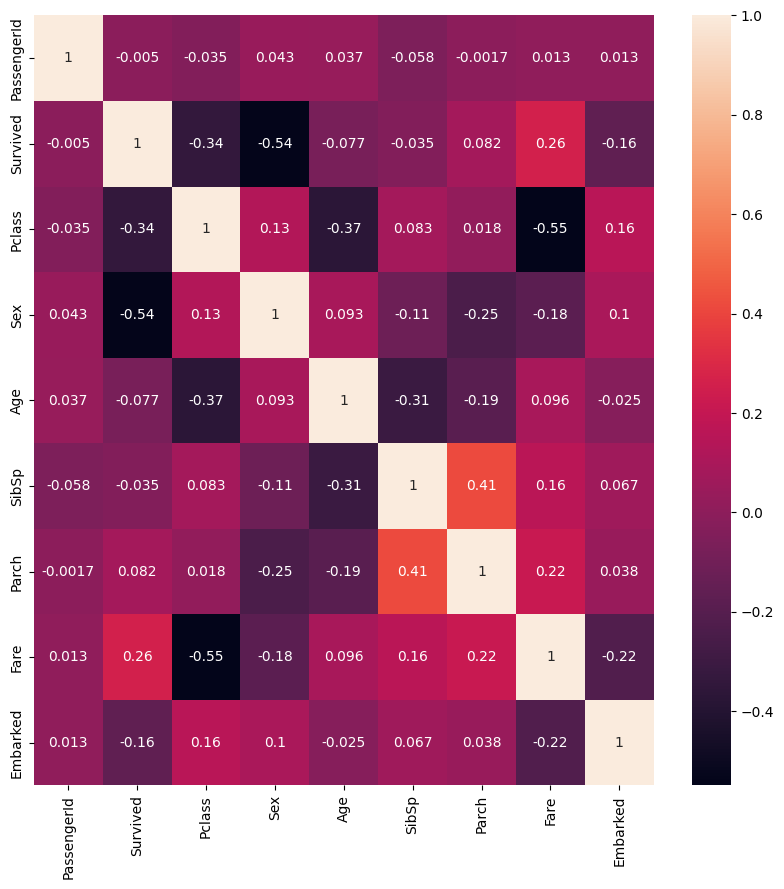

In [5]:
#A LOOK AT THE FEATURE CORRELATION
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
traind['Sex']= le.fit_transform(traind['Sex'])
traind['Embarked']= le.fit_transform(traind['Embarked'])
print(traind.drop(['Name','Ticket','Cabin'], axis=1).corr())
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(traind.drop(['Name','Ticket','Cabin'], axis=1).corr(), annot=True)
plt.show

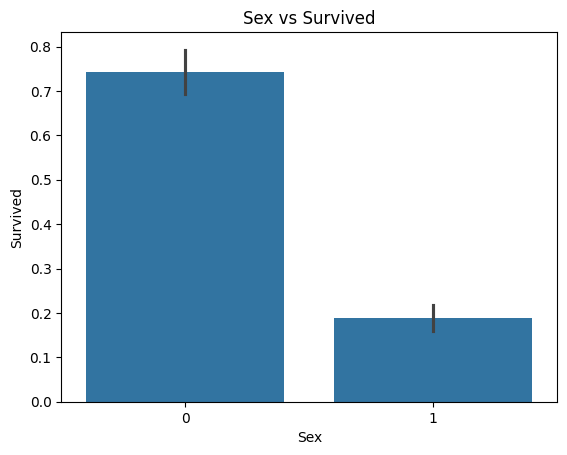

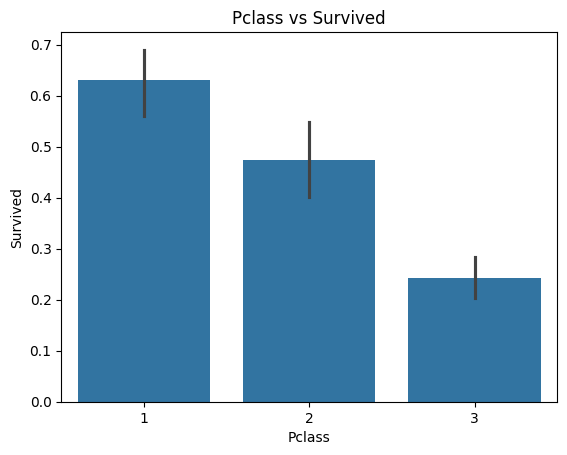

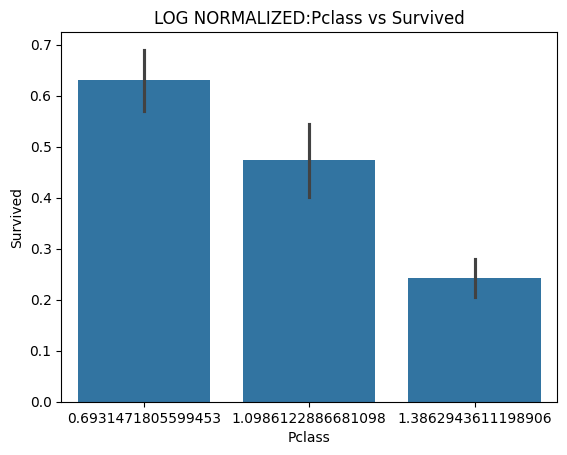

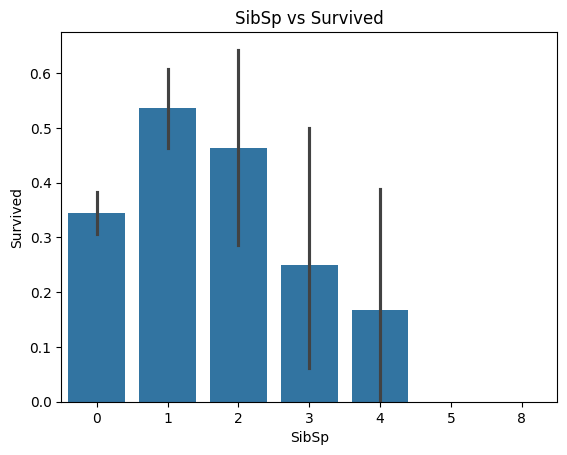

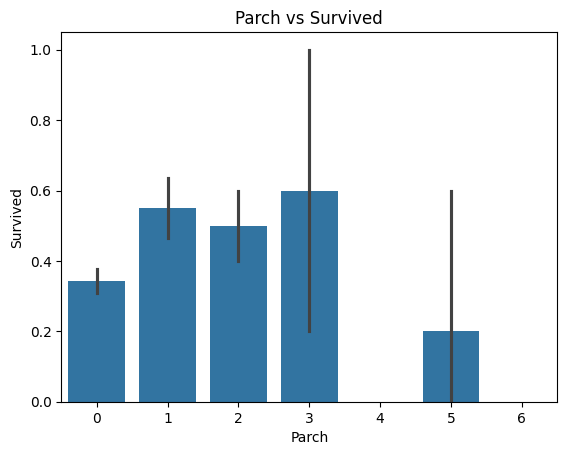

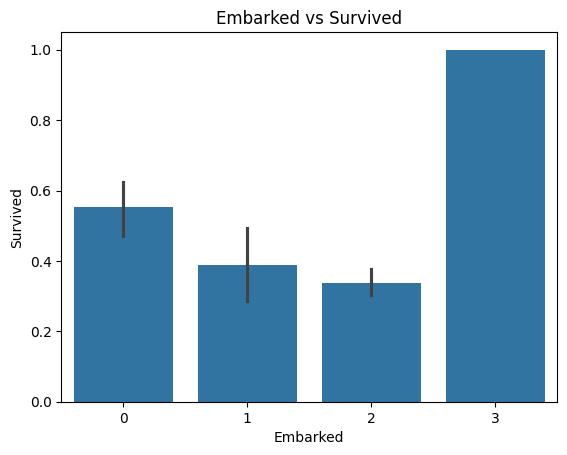

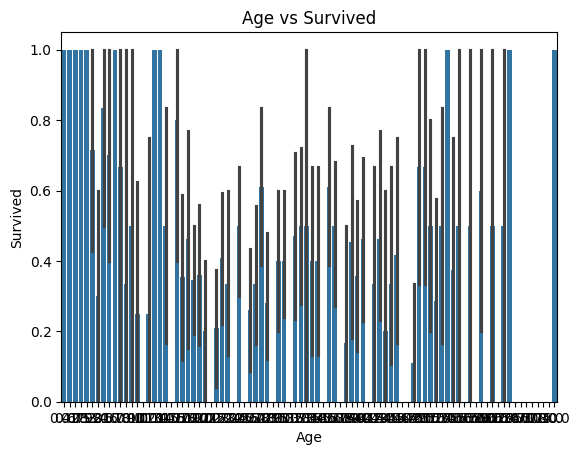

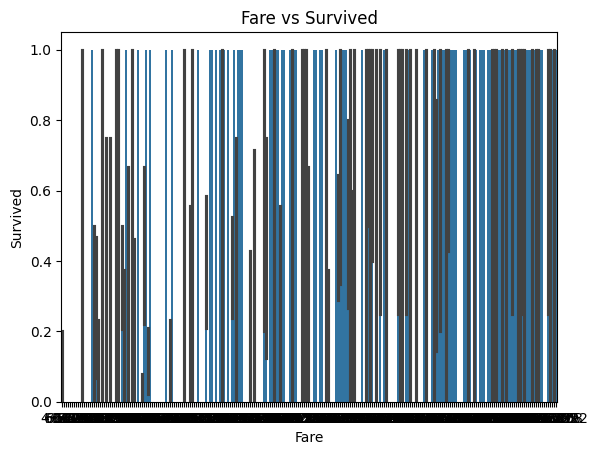

In [6]:
sns.barplot(x='Sex', y='Survived', data=traind)
plt.title('Sex vs Survived')
plt.show()
sns.barplot(x='Pclass', y='Survived', data=traind)
plt.title('Pclass vs Survived')
plt.show()
import numpy as np
traind['Pclass']=np.log(traind['Pclass']+1)
sns.barplot(x='Pclass', y='Survived', data=traind)
plt.title('LOG NORMALIZED:Pclass vs Survived')
plt.show()
plt.show()
sns.barplot(x='SibSp', y='Survived', data=traind)
plt.title('SibSp vs Survived')
plt.show()
sns.barplot(x='Parch', y='Survived', data=traind)
plt.title('Parch vs Survived')
plt.show()
sns.barplot(x='Embarked', y='Survived', data=traind)
plt.title('Embarked vs Survived')
plt.show()
sns.barplot(x='Age', y='Survived', data=traind)
plt.title('Age vs Survived')
plt.show()
sns.barplot(x='Fare', y='Survived', data=traind)
plt.title('Fare vs Survived')
plt.show()


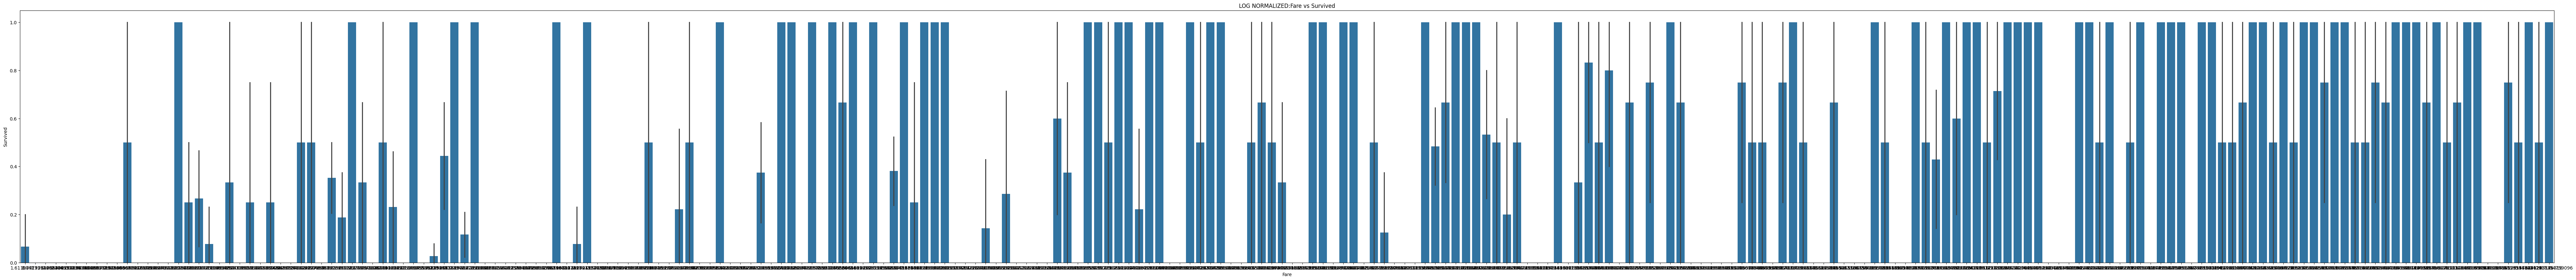

In [7]:
traind['Fare']=np.log(traind['Fare']+1)
plt.figure(figsize=(100,10))
sns.barplot(x='Fare', y='Survived', data=traind)
plt.title('LOG NORMALIZED:Fare vs Survived')
plt.show()

**DATA PREPROCESSING**

In [8]:
training_data= train_data.drop(['Cabin','Survived','PassengerId'], axis=1)#Data for taining the model
print("Training data sample")
print(training_data.head())
target= train_data['Survived']#training targets for the model
print("Target data sample")
print(target.head())


Training data sample
   Pclass                                               Name     Sex   Age  \
0       3                            Braund, Mr. Owen Harris    male  22.0   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2       3                             Heikkinen, Miss. Laina  female  26.0   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4       3                           Allen, Mr. William Henry    male  35.0   

   SibSp  Parch            Ticket     Fare Embarked  
0      1      0         A/5 21171   7.2500        S  
1      1      0          PC 17599  71.2833        C  
2      0      0  STON/O2. 3101282   7.9250        S  
3      1      0            113803  53.1000        S  
4      0      0            373450   8.0500        S  
Target data sample
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [12]:
numerical_columns= training_data.select_dtypes(include=['int64','float64']).columns
categorical_columns= training_data.select_dtypes(include=['object']).columns
print("Numerical columns")
print(numerical_columns)
print("Categorical columns")
print(categorical_columns)

Numerical columns
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical columns
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


log transformer function for normalizing the data distribution

In [27]:
def num_column_transform(X_numpy_array):
  df= pd.DataFrame(X_numpy_array,columns=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
  df['Family_size']= df['SibSp']+df['Parch']
  numerical_cols=['Age','Fare','SibSp','Parch','Family_size']
  for col in numerical_cols:
    df[col]=np.log(df[col]+(1e-9)+1)
  bins= [0.0,3.0,7.0,12.0,19.0,50.0,63.0,90.0]
  labels= ['toddler','Child','Pre_Teenager','Teenager','Adult','Senior','Old']
  df['AgeGroup']= pd.cut(df['Age'], bins=bins, labels=labels)
  fare_bins=[0.0,60.0,170.0,350.0,513]
  fare_labels=['Low','Medium','High','Very High']
  df['FareGroup']= pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)
  from sklearn.preprocessing import LabelEncoder
  le= LabelEncoder()
  df['AgeGroup']= le.fit_transform(df['AgeGroup'])
  df['FareGroup']= le.fit_transform(df['FareGroup'])
  df.drop(['SibSp','Parch'], axis=1, inplace=True)
  return df.to_numpy()

In [29]:
def cat_column_manipulator(X):
  df1= pd.DataFrame(X, columns=['Name', 'Sex','Ticket','Embarked'])
  df1['Title']= df1['Name'].str.extract('([A-Za-z]+)\.', expand=True)
  #Extract ticket prefix
  df1['Ticket_prefix']= df1['Ticket'].str.extract('([A-Za-z]+)', expand=True)
  df1.drop(['Name','Ticket'], axis=1, inplace=True)
  return df1.to_numpy()

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_tranfomer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('num_col_transform',FunctionTransformer(num_column_transform,validate=False)),
    ('scaler',  RobustScaler())
])
categorical_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_col_transform',FunctionTransformer(cat_column_manipulator,validate=False)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor= ColumnTransformer(transformers=[
    ('num', numerical_tranfomer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])
print("SUCCESS")

SUCCESS


OBTAINING HYPERPARAMETERS FOR THE MODEL

In [47]:
from inspect import Parameter
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import uniform,randint
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(training_data, target, test_size=0.2, random_state=42)
tuning_model=RandomForestClassifier()
parameter_grid={
                'n_estimators': randint(100, 1000),
                'max_features': ['sqrt', 'log2'],
                'max_depth': randint(10, 50),
                'min_samples_split': randint(2, 10),
                'min_samples_leaf': randint(1, 10),
                'bootstrap': [True, False]
}
R_grid_search=RandomizedSearchCV(tuning_model,parameter_grid, n_iter=10, cv=3, verbose=2, n_jobs=-1, random_state=42,scoring='accuracy',error_score='raise')
processed_X_train= preprocessor.fit_transform(X_train)
R_grid_search.fit(processed_X_train, y_train)
best_parameters= R_grid_search.best_params_
bestp=pd.DataFrame(best_parameters, index=[0])
print("BEST PARAMETERS")
bestp


Fitting 3 folds for each of 10 candidates, totalling 30 fits
BEST PARAMETERS


,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
0,False,39,log2,2,9,376


**MODEL CREATION AND TRAINING**

In [48]:
model=RandomForestClassifier(**best_parameters)
my_pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
my_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_col_transform',
                                                                   FunctionTransformer(func=<function num_column_transform at 0x7cd463d86a70>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer...
                                                                  ('cat_col_transform',
                                                                   FunctionTransformer(func=<function cat_column_manipulator at 0x7cd4638b1090>)),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object'))])),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=39,
                                        max_features='log2', min_samples_leaf=2,
                                        min_samples_split=9,
                                        n_estimators=376))])

**ASSESSING THE MODEL**

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred= my_pipeline.predict(X_test)
print("ACCURACY SCORE = ",(accuracy_score(y_test, y_pred))*100,"%")
print()
print("CONFUSION MATRIX")
print(confusion_matrix(y_test, y_pred))
print()
print("CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred))

ACCURACY SCORE =  84.91620111731844 %

CONFUSION MATRIX
[[94 11]
 [16 58]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



**Model Performance on all the training data**

In [50]:
pred= my_pipeline.predict(training_data)
print("ACCURACY SCORE = ",(accuracy_score(target, pred))*100,"%")
print()
print("CONFUSION MATRIX")
print(confusion_matrix(target, pred))
print()
print("CLASSIFICATION REPORT")
print(classification_report(target, pred))
preds1=pd.DataFrame({"Actual":target,"Predicted":pred})
preds1.head(15)

ACCURACY SCORE =  87.09315375982042 %

CONFUSION MATRIX
[[516  33]
 [ 82 260]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       549
           1       0.89      0.76      0.82       342

    accuracy                           0.87       891
   macro avg       0.88      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891



,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


**PREDICTIONS BASED ON THE TEST DATA**

In [51]:
testing_preds= my_pipeline.predict(test_data.drop(['PassengerId'], axis=1))
print(testing_preds)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [52]:
preds2=pd.DataFrame({"PassengerId":test_data['PassengerId'],"Survived":testing_preds})
preds2.to_csv('sub78.csv', index=False)

In [54]:
files.download("sub78.csv")
print("SUCCESSFUL")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SUCCESSFUL
